**Task-2 : UNEMPLOYEMENT ANALYSIS WITH PYTHON**

NAME : SUDIPA KONER



**Dataset used : Unemployment_Rate_upto_11_2020.csv**
####  **Data set contains :**
Date : 31/01/20 - 31/10/2020

Shape : 267,9

1.Andhra pradesh , 2. Assam , 3. Bihar   , 4. Chhattisgarh , 5.  Delhi , 5. Goa 6.Gujrat , 8. Haryana , 9. Himachal Pradesh , 10. Jammu & Kashmir , 11.Jharkhand , 12. Karnataka , 13. Kerala 14. Madhya Pradesh , 15. Maharashtra , 16.Meghalaya , 17. Odisha , 18. Puducherry , 19. Punjab, 20. Rajasthan, 21.Sikkim , 22. Tamil Nadu , 23. Telangana , 24. Tripura , 25. Uttar Pradesh, 26.Uttarakhand , 27. West Bengal


#### **Importing Libraries :**


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as ps
%matplotlib inline

#### **Mounting GDrive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sample_data


#### **Dataset Loading :**

In [4]:
un_emp_11_20  = pd.read_csv('/content/drive/My Drive/Unemployment_Data_Sets/Unemployment_Rate_upto_11_2020.csv')

#### **Exploratory Data Analysis (EDA):**

In [5]:
un_emp_11_20.tail(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [6]:
un_emp_11_20.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [7]:
un_emp_11_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


### **Data Preprocessing**

#### **1. Data Cleaning :**

In [8]:
un_emp_11_20.isnull().sum() #Checking for NULL values

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64

In [9]:
un_emp_11_20.isna().sum()  # returns the count of NA values in each column .NA values can include both null values and other types of missing values

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64

In [10]:
un_emp_11_20 = un_emp_11_20.fillna(un_emp_11_20.mean()) # Fill missing values with the mean

<ipython-input-10-cafa27fb6ea5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  un_emp_11_20 = un_emp_11_20.fillna(un_emp_11_20.mean()) # Fill missing values with the mean


In [12]:
un_emp_11_20 = un_emp_11_20.drop_duplicates(['Date', 'Region'])  # Remove Duplicate Entries

In [37]:
un_emp_11_20 = un_emp_11_20.drop_duplicates()

In [40]:
# Convert the 'Date' column to datetime format
un_emp_11_20['Date'] = pd.to_datetime(un_emp_11_20['Date'])

# Set the 'Date' column as the index
un_emp_11_20.set_index('Date', inplace=True)

<ipython-input-40-5cedbea10c02>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [13]:
un_emp_11_20.shape

(267, 9)

#### **2. Data reshaping**

In [14]:
un_emp_11_20.tail(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [15]:
un_emp_11_20.rename(columns={'Region': 'State'}, inplace=True) # Renaming the 'Region' Column to 'State' Column

In [16]:
un_emp_11_20.tail(2)

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [17]:
# Calculate average unemployment rate by state
average_unemployment_rate = un_emp_11_20.groupby('State')['Estimated Unemployment Rate (%)'].mean()

**State with HIGHEST unployment rate**


In [18]:
# Find the state with the highest unemployment rate
state_with_highest_unemployment = average_unemployment_rate.idxmax()
highest_unemployment_rate = average_unemployment_rate.max()

In [19]:
print("State with the highest unemployment rate:", state_with_highest_unemployment)
print("Highest unemployment rate:", highest_unemployment_rate)

State with the highest unemployment rate: Haryana
Highest unemployment rate: 27.476999999999997


**State with LOWEST unemployment rate**

In [20]:
# Find the state with the lowest unemployment rate
state_with_lowest_unemployment = average_unemployment_rate.idxmin()
lowest_unemployment_rate = average_unemployment_rate.min()

In [21]:
print("State with the lowest unemployment rate:", state_with_lowest_unemployment)
print("Lowest unemployment rate:", lowest_unemployment_rate)

State with the lowest unemployment rate: Meghalaya
Lowest unemployment rate: 3.8659999999999997


### **Data Visualization:**

#### **a. Line plot showing unemployment rate over time:**

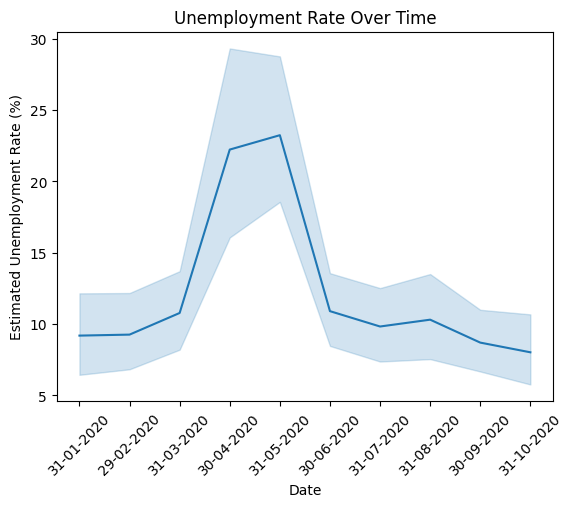

In [22]:
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=un_emp_11_20)
plt.xticks(rotation=45)
plt.title('Unemployment Rate Over Time')
plt.show()

#### **b. Bar plot displaying average unemployment rate by state:**

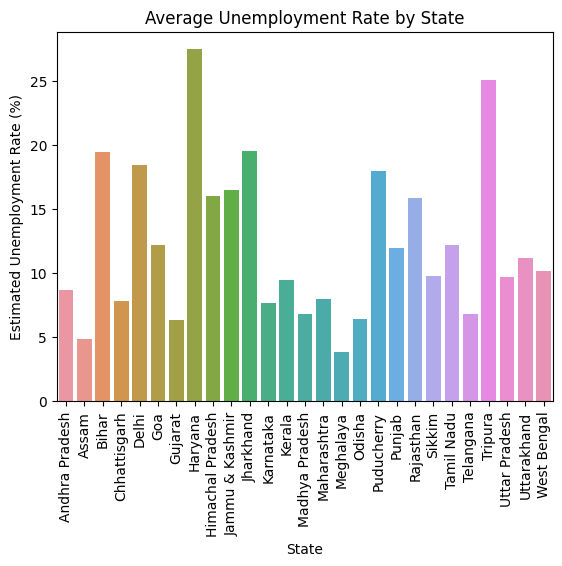

In [23]:
state_avg_unemployment = un_emp_11_20.groupby('State')['Estimated Unemployment Rate (%)'].mean().reset_index()
sns.barplot(x='State', y='Estimated Unemployment Rate (%)', data=state_avg_unemployment)
plt.xticks(rotation=90)
plt.title('Average Unemployment Rate by State')
plt.show()

#### **c. Scatter plot showing the relationship between unemployment rate and labor participation rate:**

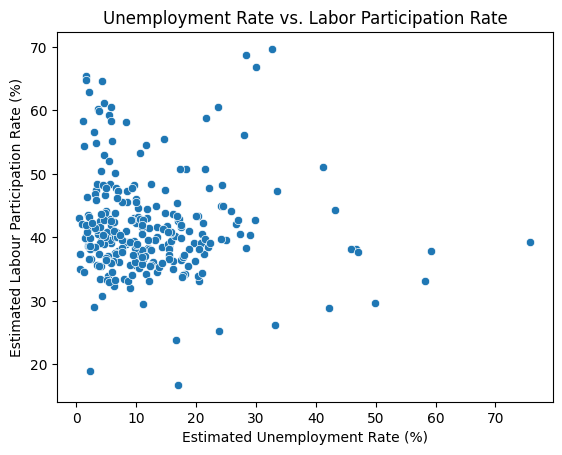

In [24]:
sns.scatterplot(x='Estimated Unemployment Rate (%)', y='Estimated Labour Participation Rate (%)', data=un_emp_11_20)
plt.title('Unemployment Rate vs. Labor Participation Rate')
plt.show()

#### **d. Histogram of Unemployment Rate Distribution:**

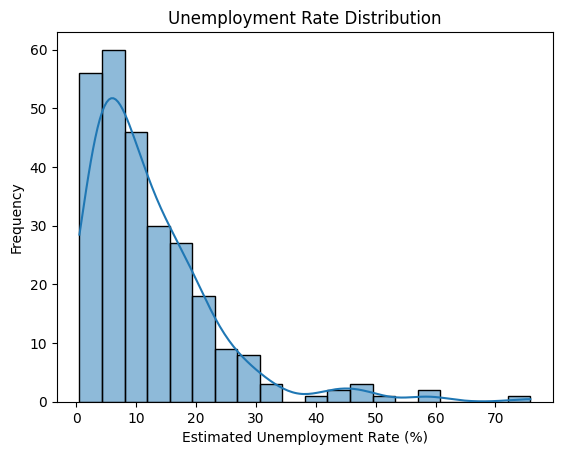

In [25]:
sns.histplot(un_emp_11_20['Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Unemployment Rate Distribution')
plt.show()

#### **e1. Area Plot of Labor Participation Rate Over Time by State :**

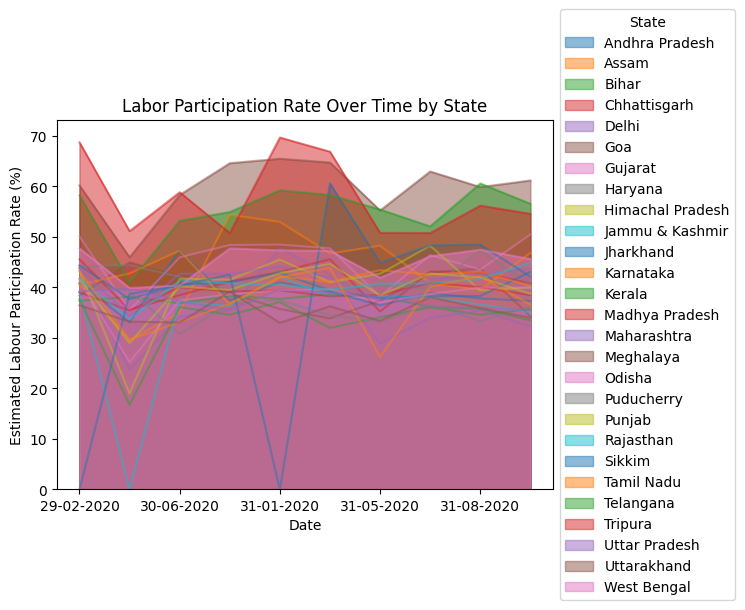

In [26]:
state_area_labor_participation = un_emp_11_20.pivot(index='Date', columns='State', values='Estimated Labour Participation Rate (%)')
state_area_labor_participation.plot(kind='area', stacked=False, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.title('Labor Participation Rate Over Time by State')
plt.legend(title='State', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### **e2. Area Plot of Labor Participation Rate Over Time by Region :**

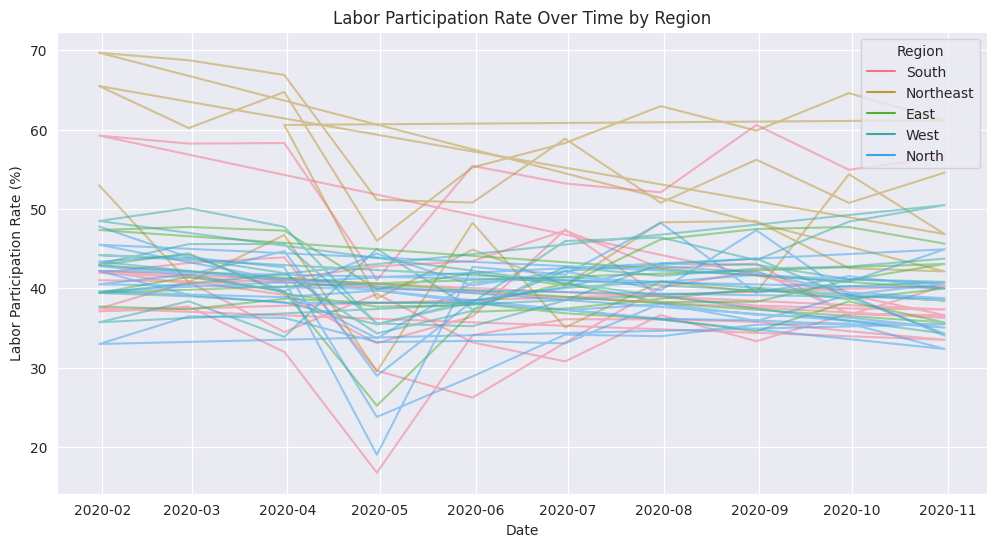

In [41]:
# Define the regions for which you want to create the area plot
regions = ['South', 'Northeast', 'East','North','West']  # Replace with your actual region names

# Filter the DataFrame based on the selected regions
filtered_un_emp_11_20 = un_emp_11_20[un_emp_11_20['Region.1'].isin(regions)]

# Create the area plot using seaborn
sns.set_palette("husl")  # Set the color palette
sns.set_style("darkgrid")  # Set the plot style
plt.figure(figsize=(12, 6))  # Set the plot size

sns.lineplot(data=filtered_un_emp_11_20, x=filtered_un_emp_11_20.index, y='Estimated Labour Participation Rate (%)', hue='Region.1', estimator=None, lw=1.5, alpha=0.5, sort=False)

# Customize the plot
plt.title('Labor Participation Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Labor Participation Rate (%)')
plt.legend(title='Region', loc='upper right')

# Display the plot
plt.show()

#### **f. Heatmap of Correlation Matrix:**

<ipython-input-30-273c99988606>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = un_emp_11_20.corr()


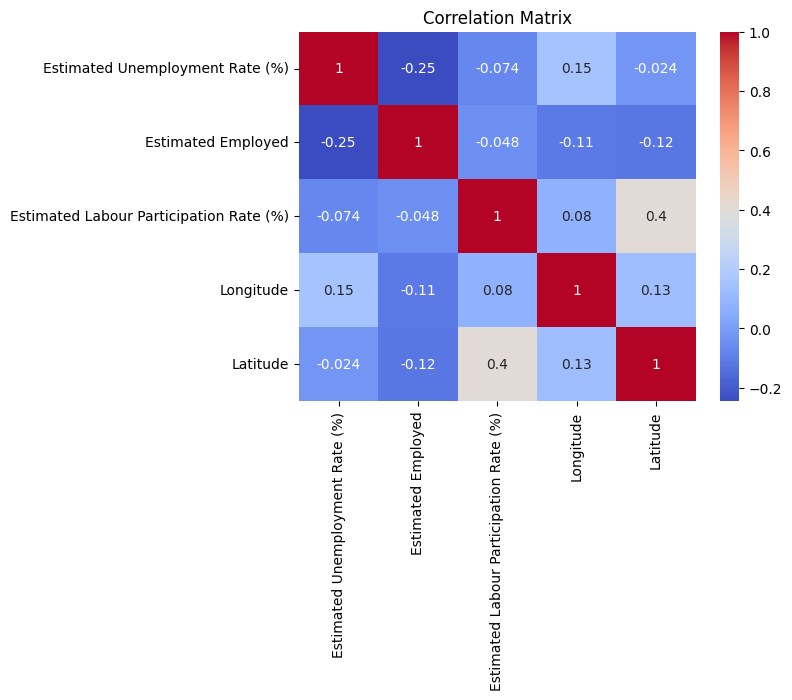

In [30]:
correlation_matrix = un_emp_11_20.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### **g. Stacked Bar Plot of Unemployment Rate by Frequency and State:**

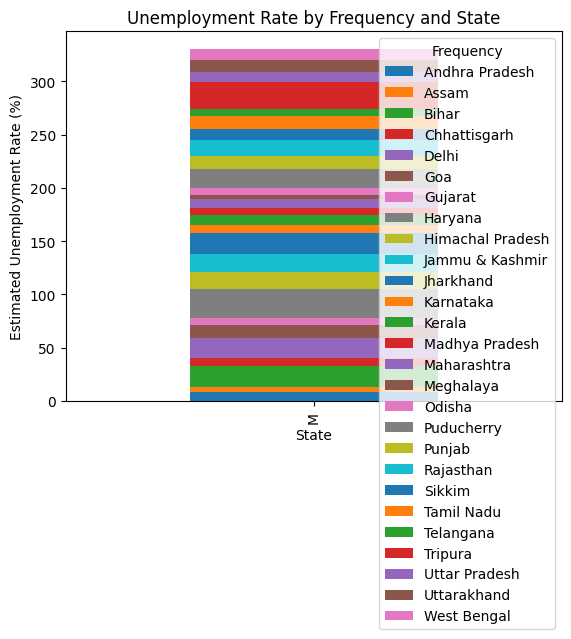

In [28]:
freq_state_unemployment = un_emp_11_20.groupby(['Frequency', 'State'])['Estimated Unemployment Rate (%)'].mean().unstack()
freq_state_unemployment.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Frequency and State')
plt.legend(title='Frequency')
plt.show()

#### **h. Boxplot of Unemployment Rate by State:**

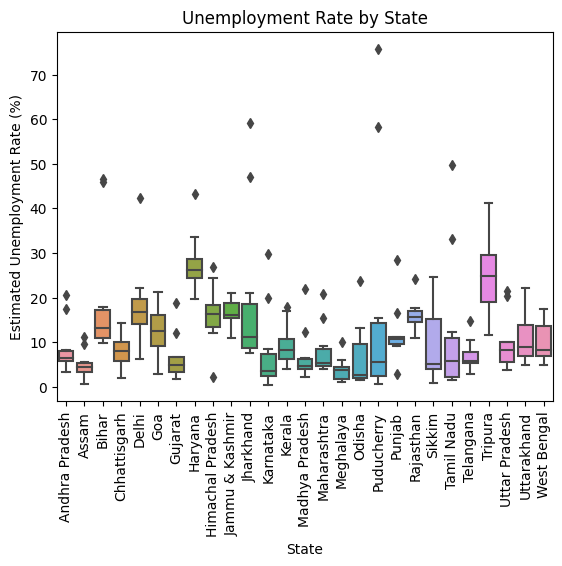

In [29]:
sns.boxplot(x='State', y='Estimated Unemployment Rate (%)', data=un_emp_11_20)
plt.xticks(rotation=90)
plt.title('Unemployment Rate by State')
plt.show()

#### **i. Sunburst chart**

In [34]:
import plotly.express as px
sunburst_data = un_emp_11_20.groupby(['Region.1','State'])['Estimated Employed'].sum().reset_index()
fig = px.sunburst(sunburst_data, path=['Region.1','State'], values='Estimated Employed')
fig.show()